# Sampling in Python
We'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability.

In [1]:
# Importing pandas
import pandas as pd

# Importing the course arrays
attrition_pop = pd.read_feather("datasets/attrition.feather")
spotify_population = pd.read_feather("datasets/spotify_2000_2020.feather")
coffee = pd.read_feather("datasets/coffee_ratings_full.feather")

# Introduction to Sampling

We sample the Spotify dataset and compare the mean duration of the population with the [sample.]()

In [2]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample)

       acousticness                          artists  danceability  \
9239       0.004190                   ['John Mayer']         0.356   
3042       0.860000         ['Kings of Convenience']         0.755   
35750      0.005200  ['Shaggy', 'Brian & Tony Gold']         0.957   
32925      0.219000                  ['Skizzy Mars']         0.711   
36375      0.052700               ['Ashley Tisdale']         0.491   
...             ...                              ...           ...   
29567      0.098700                      ['MF DOOM']         0.511   
11286      0.222000             ['Myriam Hernandez']         0.317   
13641      0.169000                ['Darius Rucker']         0.554   
13254      0.000088             ['All That Remains']         0.553   
30646      0.122000           ['Shakira', 'Rihanna']         0.694   

       duration_ms  duration_minutes  energy  explicit  \
9239      254267.0          4.237783   0.607       0.0   
3042      186467.0          3.107783   0.36

In [3]:
# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140900073
3.8105456166666665


We can also use numpy to calculate parameters or statistics from a list or pandas Series.

In [4]:
import numpy as np
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)
# Print the means
print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-6.959600000000002


Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.
The Spotify dataset contains an acousticness column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. We'll compare the acousticness distribution of the total population of songs with a sample of those songs.

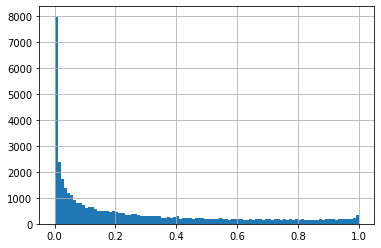

In [5]:
# Visualize the distribution of acousticness with a histogram
import matplotlib.pyplot as plt
spotify_population['acousticness'].hist(bins = np.arange(0, 1.01, 0.01))
plt.show()

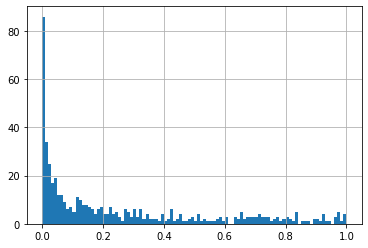

In [6]:
# Update the histogram to use spotify_mysterious_sample
spotify_mysterious_sample = spotify_population.sample(n = 500)
spotify_mysterious_sample['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

Let's look at another sample to see if it is representative of the population. This time, you'll look at the duration_minutes column of the Spotify dataset, which contains the length of the song in minutes.

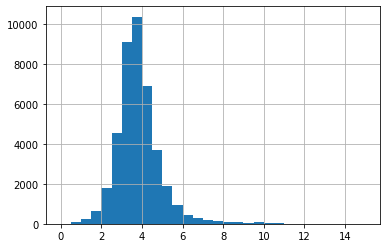

In [7]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins = np.arange(0,15.5, 0.5))
plt.show()

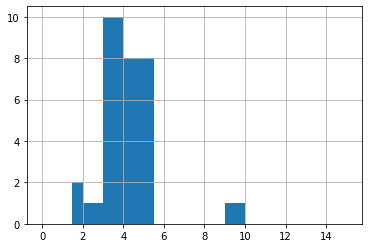

In [8]:
# Update the histogram to use spotify_mysterious_sample2
spotify_mysterious_sample2 = spotify_population.sample(n = 50)
spotify_mysterious_sample2['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

Generate 5000 numbers from a uniform distribution, setting the parameters low to -3 and high to 3.

In [9]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high =3, size =5000)

# Print uniforms
print(uniforms)

[ 2.23928759 -0.50784995  2.30523221 ... -2.70893529 -0.09188391
 -1.47490192]


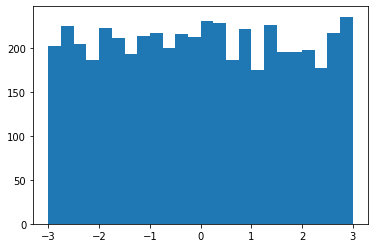

In [10]:
# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms , bins = np.arange(-3, 3.25, 0.25))
plt.show()

In [11]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale = 2, size=5000)

# Print normals
print(normals)

[3.26463347 4.52137133 4.18918621 ... 7.23019531 1.44040056 5.47910742]


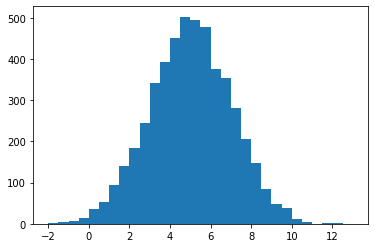

In [12]:
# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, bins = np.arange(-2, 13.5, 0.5))
plt.show()

While random numbers are important for many analyses, they create a problem: the results you get can vary slightly. 
Setting the seed for numpy's random number generator helps avoid such problems by making the random number generation reproducible.

In [13]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
y = np.random.normal(size=5)
x, y

(array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025]),
 array([ 1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ]))

In [14]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(123)
y = np.random.normal(size=5)
x, y

(array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025]),
 array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025]))

In [15]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(456)
y = np.random.normal(size=5)
x,y

(array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025]),
 array([-0.6681285 , -0.49820952,  0.61857582,  0.56869225,  1.35050948]))


# Simple random and systematic sampling

The simplest method of sampling a population is known as simple random sampling (sometimes abbreviated to "SRS"), and involves picking rows at random, one at a time, where each row has the same chance of being picked as any other.

In [16]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample
attrition_samp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,...,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,16,3,Good,9,8,0,0
531,33,0.0,Travel_Rarely,931,Research_Development,14,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,1,8,5,Better,8,7,1,6
395,31,0.0,Travel_Rarely,1332,Research_Development,11,College,Medical,High,Male,...,Excellent,Very_High,0,6,2,Good,6,5,0,1
392,29,0.0,Travel_Rarely,942,Research_Development,15,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,6,2,Good,5,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,0.0,Travel_Frequently,1410,Sales,3,Below_College,Medical,Very_High,Female,...,Outstanding,Medium,2,6,3,Better,6,5,0,4
1180,36,0.0,Travel_Rarely,530,Sales,2,Master,Life_Sciences,High,Female,...,Excellent,High,0,17,2,Good,13,7,6,7
230,26,0.0,Travel_Rarely,1443,Sales,23,Bachelor,Marketing,High,Female,...,Excellent,High,1,5,2,Good,2,2,0,0
211,29,0.0,Travel_Frequently,410,Research_Development,2,Below_College,Life_Sciences,Very_High,Female,...,Excellent,High,3,4,3,Better,3,2,0,2


One sampling method that avoids randomness is called systematic sampling. Here, you pick rows from the population at regular intervals.
For example, if the population dataset had one thousand rows, and you wanted a sample size of five, you could pick rows 0, 200, 400, 600, and 800.

In [17]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop) 

# Calculate the interval
interval = pop_size // sample_size

In [18]:
# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
attrition_sys_samp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
21,19,0.0,Travel_Rarely,1181,Research_Development,3,Below_College,Medical,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
42,45,0.0,Travel_Rarely,252,Research_Development,2,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
63,23,0.0,Travel_Rarely,373,Research_Development,1,College,Life_Sciences,Very_High,Male,...,Outstanding,Very_High,1,1,2,Better,1,0,0,1
84,30,1.0,Travel_Rarely,945,Sales,9,Bachelor,Medical,Medium,Male,...,Excellent,High,0,1,3,Good,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,48,0.0,Travel_Rarely,715,Research_Development,1,Bachelor,Life_Sciences,Very_High,Male,...,Excellent,High,0,25,3,Best,1,0,0,0
1386,48,0.0,Travel_Rarely,1355,Research_Development,4,Master,Life_Sciences,High,Male,...,Excellent,Medium,0,27,3,Better,15,11,4,8
1407,50,0.0,Travel_Rarely,989,Research_Development,7,College,Medical,Medium,Female,...,Excellent,Very_High,1,29,2,Good,27,3,13,8
1428,50,0.0,Non-Travel,881,Research_Development,2,Master,Life_Sciences,Low,Male,...,Excellent,Very_High,1,31,3,Better,31,6,14,7


Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

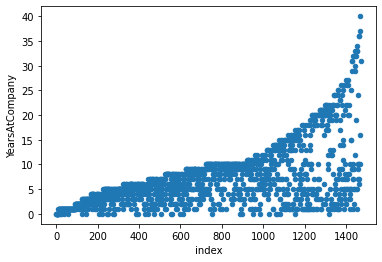

In [19]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x ='index', y ='YearsAtCompany', kind = 'scatter')
plt.show()

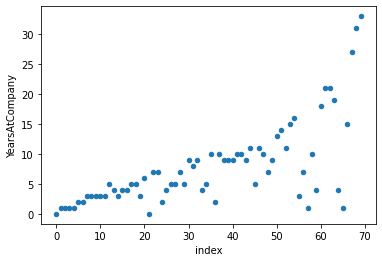

In [20]:
# Reset the row indexes and create an index column
attrition_sys_samp_ri = attrition_pop.iloc[::interval].reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_sys_samp_ri 
attrition_sys_samp_ri.plot(x ='index', y ='YearsAtCompany', kind = 'scatter')
plt.show()

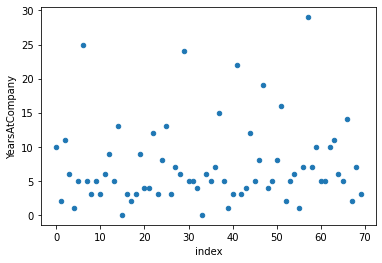

In [21]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1/21)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x ='index', y = 'YearsAtCompany', kind ='scatter')
plt.show()

**Proportional stratified sampling**

If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population. Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

In [22]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize =True)

# Print education_counts_pop
print(education_counts_pop)

Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: Education, dtype: float64


In [23]:
# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education').sample(frac = 0.4, random_state = 2022)

# Print the sample
attrition_strat

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3
1233,59,0.0,Travel_Frequently,1225,Sales,1,Below_College,Life_Sciences,Low,Female,...,Excellent,Very_High,0,20,2,Good,4,3,1,3
366,37,0.0,Travel_Rarely,571,Research_Development,10,Below_College,Life_Sciences,Very_High,Female,...,Excellent,Medium,2,6,3,Good,5,3,4,3
702,31,0.0,Travel_Frequently,163,Research_Development,24,Below_College,Technical_Degree,Very_High,Female,...,Outstanding,Very_High,0,9,3,Good,5,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,38,0.0,Travel_Frequently,653,Research_Development,29,Doctor,Life_Sciences,Very_High,Female,...,Excellent,Very_High,0,10,2,Better,10,3,9,9
1061,44,0.0,Travel_Frequently,602,Human_Resources,1,Doctor,Human_Resources,Low,Male,...,Excellent,High,0,14,3,Better,10,7,0,2
1307,41,0.0,Travel_Rarely,1276,Sales,2,Doctor,Life_Sciences,Medium,Female,...,Excellent,Medium,1,22,2,Better,18,16,11,8
1060,33,0.0,Travel_Rarely,516,Research_Development,8,Doctor,Life_Sciences,Very_High,Male,...,Excellent,Low,0,14,6,Better,0,0,0,0


In [24]:
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize = True)

# Print education_counts_strat
print(education_counts_strat)

Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64


By grouping then sampling, the size of each group in the sample is representative of the size of the sample in the population.

If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

In [25]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education').sample(n=30, random_state=2022)

# Print the sample
attrition_eq

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3
1233,59,0.0,Travel_Frequently,1225,Sales,1,Below_College,Life_Sciences,Low,Female,...,Excellent,Very_High,0,20,2,Good,4,3,1,3
366,37,0.0,Travel_Rarely,571,Research_Development,10,Below_College,Life_Sciences,Very_High,Female,...,Excellent,Medium,2,6,3,Good,5,3,4,3
702,31,0.0,Travel_Frequently,163,Research_Development,24,Below_College,Technical_Degree,Very_High,Female,...,Outstanding,Very_High,0,9,3,Good,5,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,33,0.0,Travel_Rarely,922,Research_Development,1,Doctor,Medical,Low,Female,...,Excellent,High,1,10,2,Better,6,1,0,5
869,45,0.0,Travel_Rarely,1015,Research_Development,5,Doctor,Medical,High,Female,...,Excellent,Low,0,10,3,Better,10,7,1,4
530,32,0.0,Travel_Rarely,120,Research_Development,6,Doctor,Life_Sciences,High,Male,...,Outstanding,Low,0,8,2,Better,5,4,1,4
1049,48,0.0,Travel_Rarely,163,Sales,2,Doctor,Marketing,Medium,Female,...,Excellent,Low,1,14,2,Better,9,7,6,7


In [26]:
# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize = True)

# Print the results
print(education_counts_eq)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64


Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is **weighted sampling**, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.

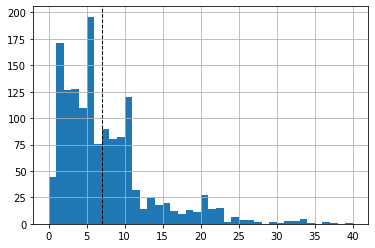

In [27]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins =np.arange(0,41, 1))
plt.axvline(attrition_pop['YearsAtCompany'].mean(), color = 'k', linestyle = 'dashed', linewidth = 1 )
plt.show()

In [28]:
# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights ='YearsAtCompany')

# Print the sample
attrition_weight

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
49,20,1.0,Travel_Rarely,129,Research_Development,4,Bachelor,Technical_Degree,Low,Male,...,Excellent,Medium,0,1,2,Better,1,0,0,0
1304,41,0.0,Travel_Rarely,334,Sales,2,Master,Life_Sciences,Very_High,Male,...,Excellent,Medium,0,22,2,Better,22,10,0,4
1019,37,0.0,Travel_Rarely,1319,Research_Development,6,Bachelor,Medical,High,Male,...,Excellent,Low,2,13,2,Better,7,7,6,7
323,36,0.0,Travel_Frequently,1195,Research_Development,11,Bachelor,Life_Sciences,Medium,Male,...,Excellent,High,0,6,3,Better,6,5,0,3
932,31,0.0,Travel_Rarely,1232,Research_Development,7,Master,Medical,High,Female,...,Excellent,High,0,11,2,Good,11,9,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,33,1.0,Travel_Rarely,813,Research_Development,14,Bachelor,Medical,High,Male,...,Excellent,High,1,8,2,Bad,5,4,0,4
1160,38,0.0,Travel_Rarely,119,Sales,3,Bachelor,Life_Sciences,Low,Male,...,Excellent,High,2,17,6,Good,16,10,5,13
1307,41,0.0,Travel_Rarely,1276,Sales,2,Doctor,Life_Sciences,Medium,Female,...,Excellent,Medium,1,22,2,Better,18,16,11,8
870,45,0.0,Non-Travel,336,Sales,26,Bachelor,Marketing,Low,Male,...,Excellent,Low,1,10,2,Better,10,7,4,5


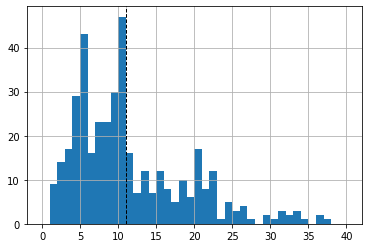

In [29]:
# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins = np.arange(0,41,1))
plt.axvline(attrition_weight['YearsAtCompany'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

**Cluster sampling** is a two-stage sampling technique that is closely related to stratified sampling. First, you randomly sample which subgroups to include in the sample, then randomly sample rows within each subgroup.

In [30]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
import random
job_roles_samp = random.sample(job_roles_pop, k = 4)

# Print the result
print(job_roles_samp)

['Sales_Representative', 'Manager', 'Healthcare_Representative', 'Manufacturing_Director']


In [31]:
# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]
# Print the result
attrition_filtered

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0
9,18,1.0,Travel_Frequently,544,Sales,3,College,Medical,Medium,Female,...,Excellent,High,0,0,2,Best,0,0,0,0
23,19,1.0,Travel_Frequently,602,Sales,1,Below_College,Technical_Degree,High,Female,...,Outstanding,Low,0,1,5,Best,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,56,0.0,Travel_Rarely,1400,Research_Development,7,Bachelor,Life_Sciences,Very_High,Male,...,Excellent,Low,0,37,3,Good,6,4,0,2
1464,55,0.0,Travel_Rarely,452,Research_Development,1,Bachelor,Medical,Very_High,Male,...,Excellent,High,0,37,2,Better,36,10,4,13
1465,55,0.0,Travel_Rarely,1117,Sales,18,Doctor,Life_Sciences,Low,Female,...,Outstanding,Very_High,0,37,2,Better,10,9,7,7
1466,58,0.0,Non-Travel,350,Sales,2,Bachelor,Medical,Medium,Male,...,Outstanding,Very_High,1,37,0,Good,16,9,14,14


In [32]:
# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby('JobRole').sample(n=10, random_state=2022)

# Print the sample
attrition_clust

C:\Users\valen\AppData\Local\Temp\ipykernel_30688\2356035226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
812,31,0.0,Travel_Rarely,616,Research_Development,12,Bachelor,Medical,Very_High,Female,...,Excellent,High,2,10,2,Bad,9,7,8,5
1190,38,0.0,Travel_Rarely,1495,Research_Development,10,Bachelor,Medical,High,Female,...,Excellent,High,1,18,4,Better,1,0,0,0
378,33,0.0,Travel_Rarely,1069,Research_Development,1,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Low,0,6,3,Better,5,0,1,4
920,35,0.0,Travel_Frequently,1199,Research_Development,18,Master,Life_Sciences,High,Male,...,Excellent,Very_High,2,10,2,Best,10,2,0,2
917,33,0.0,Travel_Rarely,501,Research_Development,15,College,Medical,Medium,Female,...,Excellent,Low,1,10,6,Better,9,7,8,1
1058,34,0.0,Travel_Rarely,404,Research_Development,2,Master,Technical_Degree,High,Female,...,Excellent,Very_High,0,14,2,Best,14,11,4,11
1264,46,0.0,Travel_Frequently,638,Research_Development,1,Bachelor,Medical,High,Male,...,Excellent,High,1,21,5,Good,10,9,9,5
1340,44,0.0,Travel_Rarely,477,Research_Development,7,Master,Medical,Low,Female,...,Excellent,Very_High,1,24,4,Better,22,6,5,17
655,34,0.0,Travel_Rarely,1442,Research_Development,9,Bachelor,Medical,Very_High,Female,...,Excellent,Medium,0,9,3,Best,8,7,7,7
896,42,0.0,Travel_Rarely,1128,Research_Development,13,Bachelor,Medical,Medium,Male,...,Excellent,High,2,10,2,Good,0,0,0,0


We're going to compare the performance of point estimates using simple, stratified, and cluster sampling. 
We'll use the RelationshipSatisfaction column of the attrition_pop dataset, which categorizes the employee's relationship with the company. It has four levels: Low, Medium, High, and Very_High. pandas has been loaded with its usual alias, and the random package has been loaded.

In [33]:
# Perform simple random sampling to get 0.33 of the population
attrition_srs = attrition_pop.sample(frac=1/3, random_state= 2022)

In [34]:
# Perform stratified sampling to get 0.33 of each relationship group
attrition_strat = attrition_pop.groupby('RelationshipSatisfaction').sample(frac=1/3, random_state =2022)

In [35]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k = 2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.17 of attrition_pop
attrition_clust = attrition_clust_prep.groupby('RelationshipSatisfaction').sample(n = len(attrition_pop)//6, random_state = 2022)

C:\Users\valen\AppData\Local\Temp\ipykernel_30688\1689276962.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()


In [36]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_pop)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64


In [37]:
# Calculate the same thing for the simple random sample 
mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_srs)

RelationshipSatisfaction
Low          0.141304
Medium       0.145833
High         0.154321
Very_High    0.150000
Name: Attrition, dtype: float64


In [38]:
# Calculate the same thing for the stratified sample 
mean_attrition_strat = attrition_strat.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_strat)

RelationshipSatisfaction
Low          0.228261
Medium       0.108911
High         0.143791
Very_High    0.138889
Name: Attrition, dtype: float64


In [39]:
# Calculate the same thing for the cluster sample 
mean_attrition_clust = attrition_clust.groupby('RelationshipSatisfaction')['Attrition'].mean()
# Print the result
print(mean_attrition_clust)

RelationshipSatisfaction
Low          0.191837
Very_High    0.134694
Name: Attrition, dtype: float64


# Sampling Distributions

**Relative error of point estimates**

The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is **relative error**. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

In [40]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state = 2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100*abs(mean_attrition_pop - mean_attrition_srs50)/mean_attrition_pop

# Print rel_error_pct50
print(rel_error_pct50)

RelationshipSatisfaction
Low          70.947368
Medium       59.600000
High         61.211268
Very_High    59.500000
Name: Attrition, dtype: float64


**Replicating samples**

When you calculate a point estimate such as a sample mean, the value we calculate depends on the rows that were included in the sample. That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, we can create many samples and calculate the sample mean (or another statistic) for each sample.

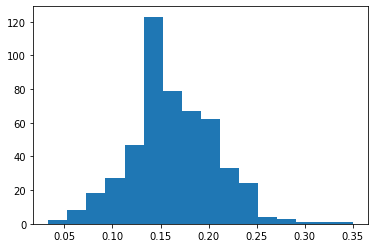

In [41]:
# Create an empty list
mean_attritions= []
# Loop 500 times to create 500 sample means
for n in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)
  
# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins = 16)
plt.show()

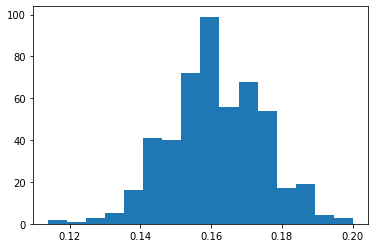

In [42]:
# Create an empty list
mean_attritions= []
# Loop 500 times to create 500 sample means
for n in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=500)['Attrition'].mean()
	)
  
# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins = 16)
plt.show()

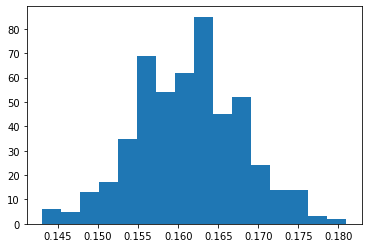

In [43]:
# Create an empty list
mean_attritions= []
# Loop 500 times to create 500 sample means
for n in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=1000)['Attrition'].mean()
	)
  
# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins = 16)
plt.show()

As sample size increases, on average each sample mean has a lower relative error compared to the population mean, thus reducing the range of the distribution.

**Exact sampling distribution**

To quantify how the point estimate (sample statistic) you are interested in varies, you need to know all the possible values it can take and how often. That is, you need to know its distribution.

The distribution of a sample statistic is called the sampling distribution. When we can calculate this exactly, rather than using an approximation, it is known as the exact sampling distribution.

Let's take another look at the sampling distribution of dice rolls. This time, we'll look at five eight-sided dice. (These have the numbers one to eight.)

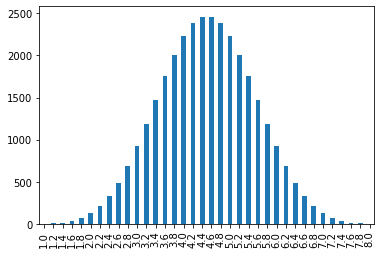

In [44]:
# Expand a grid representing 5 8-sided dice
import  itertools
def expand_grid(data_dict):
        rows = itertools.product(*data_dict.values())
        return pd.DataFrame.from_records(rows, columns=data_dict.keys())
    
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')
plt.show()

Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is 8^5, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, we can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, we can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

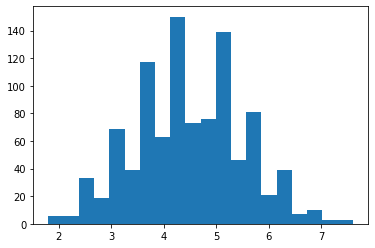

In [45]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins = 20)
plt.show()

Notice that the histogram is close to but not exactly the same as the shape of the bar graph from the previous exercise.

**Population & sampling distribution means**

One of the useful features of sampling distributions is that you can quantify them. Specifically, you can calculate summary statistics on them. Here, you'll look at the relationship between the mean of the sampling distribution and the population parameter's mean.

Three sampling distributions are provided. For each, the employee attrition dataset was sampled using simple random sampling, then the mean attrition was calculated. This was done 1000 times to get a sampling distribution of mean attritions. One sampling distribution used a sample size of 5 for each replicate, one used 50, and one used 500

In [46]:
# Create an list of sampling distributions (sample size of 5)
sampling_distribution_5= []
# Loop 500 times to create 500 sample means
for n in range(500):
	sampling_distribution_5.append(
    	attrition_pop.sample(n=5)['Attrition'].mean()
	)
    
# Create an list of sampling distributions (sample size of 50)
sampling_distribution_50= []
# Loop 500 times to create 50 sample means
for n in range(500):
	sampling_distribution_50.append(
    	attrition_pop.sample(n=5)['Attrition'].mean()
	)  
    
# Create an list of sampling distributions (sample size of 500)
sampling_distribution_500= []
# Loop 500 times to create 500 sample means
for n in range(500):
	sampling_distribution_500.append(
    	attrition_pop.sample(n=5)['Attrition'].mean()
	)

In [47]:
# Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)
# Print the results
print(mean_of_means_5)
print(mean_of_means_50)
print(mean_of_means_500)

0.158
0.17240000000000003
0.1632


In [48]:
# Calculate the population mean.
attrition_pop['Attrition'].mean()

0.16122448979591836

Regardless of sample size, the mean of the sampling distribution is a close approximation to the population mean. Even for small sample sizes, the mean of the sampling distribution is a good approximation of the population mean.

**Population & sampling distribution variation**

We just calculated the mean of the sampling distribution and saw how it is an estimate of the corresponding population parameter. Similarly, as a result of the central limit theorem, the standard deviation of the sampling distribution has an interesting relationship with the population parameter's standard deviation and the sample size. **Note that when we are calculating a population standard deviation with 'pandas.std', we must specify ddof equals zero, as 'pandas.std' calculates a sample standard deviation by default. When we are calculating a standard deviation on a sample of the population using NumPy's std function,  we must specify a ddof of one.**

In [49]:
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5, ddof=1)
sd_of_means_50 = np.std(sampling_distribution_50, ddof=1)
sd_of_means_500 = np.std(sampling_distribution_500, ddof=1)

# Print the results
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)

0.16531987576406318
0.16496261797953293
0.1594258234614855


In [50]:
# Calculate the std. dev. of
attrition_pop['Attrition'].std(ddof =0)

0.367737887204955

The standard deviation of the sampling distribution is approximately equal to the population standard deviation divided by the square root of the sample size.

**The central limit theorem - the means of independent samples have normal distributions, as the sample size increases, we see two things: the distribution of these averages gets closer to being normal, and the width of this sampling distribution gets narrower.**

# Introduction to bootstrapping

Bootstrapping is, in some sense, the opposite of sampling from a population. Sampling treats your dataset as the population, and you generate a random subset. Bootstrapping treats your dataset as a sample and uses it to build up a theoretical population.

The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is different.
To make a sampling distribution, you start with the population and sample without replacement. To make a bootstrap distribution, you start with a sample and sample that with replacement. After that, the steps are the same: calculate the summary statistic that you are interested in on that sample/resample, then replicate the process many times. In each case, you can visualize the distribution with a histogram.

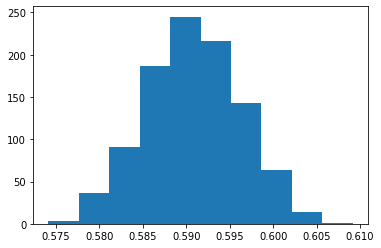

In [51]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)

# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

**Sampling distribution vs. bootstrap distribution**

The sampling distribution and bootstrap distribution are closely linked. In situations where you can repeatedly sample from a population (these occasions are rare), it's helpful to generate both the sampling distribution and the bootstrap distribution, one after the other, to see how they are related.

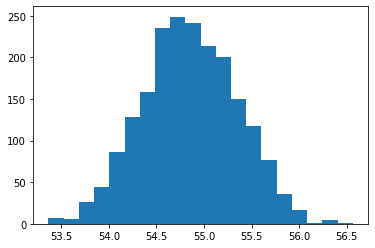

In [52]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity 
    	spotify_population.sample(n =500)['popularity'].mean()
    )

# Draw a histogram of sampling distribution results
plt.hist(mean_popularity_2000_samp, bins = 20)
plt.show()

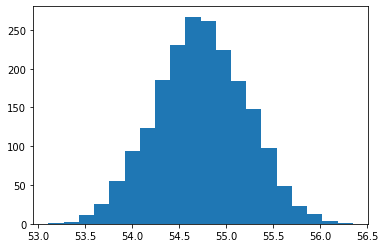

In [53]:
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	spotify_sample.sample(n=500, replace= True)['popularity'].mean()
    )

# Draw a histogram of bootstrap distribution results
plt.hist(mean_popularity_2000_boot, bins = 20)
plt.show()

In [54]:
# Calculate the population mean popularity
pop_mean = np.mean(spotify_population['popularity'])

# Calculate the original sample mean popularity
samp_mean = np.mean(spotify_population['popularity'].sample(n=5000))

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(mean_popularity_2000_samp)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(mean_popularity_2000_boot)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.8568, 54.851591, 54.732724000000005]


The sampling distribution mean is the best estimate of the true population mean; the bootstrap distribution mean is closest to the original sample mean. The sampling distribution mean can be used to estimate the population mean, but that is not the case with the bootstrap distribution.

**Compare sampling and bootstrap standard deviations**

In the same way that you looked at how the sampling distribution and bootstrap distribution could be used to estimate the population mean, you'll now take a look at how they can be used to estimate variation, or more specifically, the standard deviation, in the population.

In [55]:
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std(ddof = 0)

# Calculate the original sample std dev popularity
samp_sd = spotify_population['popularity'].sample(n=2000).std()

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(mean_popularity_2000_samp, ddof=1)*np.sqrt(len(spotify_sample.sample(n=500)))
# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(mean_popularity_2000_boot, ddof=1)*np.sqrt(len(spotify_sample.sample(n=500, replace= True)))

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[10.880065274257536, 10.87542252777237, 11.119888008166138, 10.740277496058757]


**Calculating confidence intervals**
There are two methods for calculating confidence intervals: the quantile method and the standard error method. The standard error method involves using the inverse cumulative distribution function (inverse CDF) of the normal distribution to calculate confidence intervals.

The calculation from the bootstrap distribution is the best estimate of the population standard deviation.

In [56]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(mean_popularity_2000_boot, 0.025)
upper_quant = np.quantile(mean_popularity_2000_boot, 0.975)
# Print quantile method confidence interval
print((lower_quant, upper_quant))

(53.789899999999996, 55.638149999999996)


In [57]:
# Generate a 95% confidence interval using the standard error method from the bootstrap distribution
from scipy.stats import norm
# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(mean_popularity_2000_boot)
standard_error = np.std(mean_popularity_2000_boot, ddof=1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, loc = point_estimate, scale = standard_error)

# Find the upper limit of the confidence interval
upper_se =norm.ppf(0.975, loc = point_estimate, scale = standard_error)

# Print standard error method confidence interval
print(lower_se, upper_se)

53.79131446826571 55.6741335317343
